A high-level standard workflow for any NLP project
<img src=" nlp_workflow.png">

## Text Cleaning or Preprocessing (Task Specific)
In books there are general assumptions for the text that we can make:-
#1) It’s plain text so there is no markup to parse.
#2) there are many many /n new lines in the text and also extra whitespaces.
#3) There are no typos or spelling mistakes.
#4) There’s punctuation, A lot of it. 
#5) There’s hyphenated descriptions like "inter-personal"
#6) There’s a lot of use of the dash "-" to continue sentences like "is the author of-
    his or her own world, life design, choices, and actions"
#7) There are some names
#8) There are roman letters
#9) Accented text may/may not be present

!pip install unidecode

!python -m spacy validate

!pip install pycontractions

In [177]:
import pandas as pd
import numpy as np
import nltk

import re
import spacy
#import neuralcoref
import en_core_web_sm
import unidecode
import unicodedata
#from pycontractions import Contractions

from spacy.matcher import Matcher 
from spacy.tokens import Span 

!pip install neuralcoref

!python -m spacy download en_core_web_sm

In [178]:

filename = 'Books\\existential-psychotherapy.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
len(text)

1320563

# Removing accented characters
Usually in any text corpus, you might be dealing with accented characters/letters, especially if you only want to analyze the English language. Hence, we need to make sure that these characters are converted and standardized into ASCII characters. A simple example — converting é to e.

In [179]:
text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

# Expanding Contractions
Contractions are shortened version of words or syllables. They often exist in either written or spoken forms in the English language. These shortened versions or contractions of words are created by removing specific letters and sounds. In case of English contractions, they are often created by removing one of the vowels from the word. Examples would be, do not to don’t and I would to I’d. Converting each contraction to its expanded, original form helps with text standardization.

In [180]:
# As using pycontractions was really very slow so used a map for the contractions
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"}

In [181]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text



In [182]:
text = expand_contractions(text)

In [183]:
len(text)

1319060

# Deviding the book into chapters
#1 As the book is somewhat cumbersome to process and visualize at once so have to divide into chapters to get a crux of each chapter
#2 Also we should be able to judge the book wihout the introductions and name of the book so we are directly skipping to the index where chapter 1 books

In [184]:
##skipping to chapter 1,
text = text[8520:]

In [185]:
#we want to eliminate the last chapter 1
regex_num = re.compile("CHAPTER \d+")
s = regex_num.findall(text)

s

['CHAPTER 1',
 'CHAPTER 2',
 'CHAPTER 3',
 'CHAPTER 4',
 'CHAPTER 5',
 'CHAPTER 6',
 'CHAPTER 7',
 'CHAPTER 8',
 'CHAPTER 9',
 'CHAPTER 10',
 'CHAPTER 1']

In [186]:
#finding the start index of each chapter
Chapter_startIndex = [m.start() for m in re.finditer('CHAPTER \d+', text)]

In [187]:
text = text[:Chapter_startIndex[10]]

In [188]:
Chapter_startIndex = Chapter_startIndex[0:10]

In [189]:
# list having chapters in each index
Chapters = []
c = 0
for i in range(len(Chapter_startIndex)-1):
    Chapters.append(text[Chapter_startIndex[i]+10:Chapter_startIndex[i+1]]) 

Chapters.append(text[Chapter_startIndex[-1]+10:])

In [168]:
Chapters[0]

'                   Introduction\n0       NCE, several years ago, some friends and I enrolled in a cooking\nclass taught by an Armenian matriarch and her aged servant. Since\nthey spoke no English and we no Armenian, communication was not\neasy. She taught by demonstration; we watched (and diligently tried to\nquantify her recipes) as she prepared an array of marvelous eggplant\nand lamb dishes. But our recipes were imperfect; and, try as hard as we\ncould, we could not duplicate her dishes. "What was it," I wondered,\n"that gave her cooking that special touch?" The answer eluded me un-\ntil one day, when I was keeping a particularly keen watch on the kitch-\nen proceedings, I saw our teacher, with great dignity and deliberation,\nprepare a dish. She handed it to her servant who wordlessly carried it\ninto the kitchen to the oven and, without breaking stride, threw in\nhandful after handful of assorted spices and condiments. I am con-\nvinced that those surreptitious "throw-ins" made a

# Remove extra newlines and spaces and tabs after making Chapters

In [190]:

def remove_extra_whitespace_tabs(text):
    #pattern = r'^\s+$|\s+$'
    text = re.sub(r'\-\n+', '-', text) # retaining the hyphen
    text = re.sub(r'\n+', ' ', text) # replace multiple newlines with period
    pattern = r'^\s*|\s\s*'
    return re.sub(pattern, ' ', text).strip()
# call function
for i in range(len(Chapters)):
    Chapters[i] = remove_extra_whitespace_tabs(Chapters[i])


In [191]:
Chapters[0]

'Introduction 0 NCE, several years ago, some friends and I enrolled in a cooking class taught by an Armenian matriarch and her aged servant. Since they spoke no English and we no Armenian, communication was not easy. She taught by demonstration; we watched (and diligently tried to quantify her recipes) as she prepared an array of marvelous eggplant and lamb dishes. But our recipes were imperfect; and, try as hard as we could, we could not duplicate her dishes. "What was it," I wondered, "that gave her cooking that special touch?" The answer eluded me un-til one day, when I was keeping a particularly keen watch on the kitch-en proceedings, I saw our teacher, with great dignity and deliberation, prepare a dish. She handed it to her servant who wordlessly carried it into the kitchen to the oven and, without breaking stride, threw in handful after handful of assorted spices and condiments. I am con-vinced that those surreptitious "throw-ins" made all the difference. That cooking class ofte

# Remove special characters accept space and period

In [195]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s\.\-]' if not remove_digits else r'[^a-zA-z\s\.\-]'
    text = re.sub(pattern, '', text)
    return text
for i in range(len(Chapters)):
    Chapters[i] = remove_special_characters(Chapters[i], 
                          remove_digits=True)


# Handle hyphenated text

In [196]:
def remove_hyphenated_text(text):   
    separate = text.split('-')
    combined = ''.join(separate)
    return combined
for i in range(len(Chapters)):
    Chapters[i] = remove_hyphenated_text(Chapters[i])

# Lemmatization

In [197]:
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 1500000

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

for i in range(len(Chapters)):
    Chapters[i] = lemmatize_text(Chapters[i])

In [198]:
from nltk.tokenize import ToktokTokenizer
tokenizer=ToktokTokenizer()

In [20]:
Chapters_without_stp=Chapters.copy()

#I have used lists of stop words from three different websites and then concatenate the unique words using union of set function in 1 list
stop_words=[ "a", "about", "above", "after", "again", "against",  "am", "an", "and", "any", "are", "as", "at", "be",
            "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does",
            "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he",
            "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's",
            "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", 
            "more", "most", "my", "myself", "of", "on", "once", "only", "or", "other", "ought", "our", "ours",
            "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", 
            "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these",
            "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", 
            "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's",
            "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you",
            "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
stop_words1=['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having',
             'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 
             'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 
             'these', 'your', 'his', 'through', 'don', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our',
             'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she' , 'when', 'at', 'any', 'before', 'them', 
             'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 
             'why', 'so', 'can', 'did', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself',
             'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 
             'how', 'further', 'was', 'here', 'than']
stop_words2=["a", "about", "above", "above", "across", "after", "afterwards", "again", "against",  "almost", "alone", "along", 
             "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any",
             "anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become",
             "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond",
             "bill", "both", "bottom","but", "by", "call", "can", "cant", "co", "con", "could", "couldnt", "de", 
             "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere",
             "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify"
             , "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", 
             "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", 
             "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", 
             "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many",
             "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", 
             "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", 
               "now", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", 
             "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re",
             "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere",
             "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such",
             "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", 
             "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three",
             "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un",
             "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence",
             "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", 
             "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", 
             "your", "yours", "yourself", "yourselves", "the"]
stop_words=list(set().union(stop_words,stop_words1,stop_words2))
print(len(stop_words))
def remove_stopwords(text,stop_words):
    # convert sentence into token of words
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    # check in lowercase 
    t = [token for token in tokens if token.lower() not in stop_words]
    text = ' '.join(t)    
    return text
# call function
for i in range(len(Chapters)):
    Chapters_without_stp[i] = remove_stopwords(Chapters[i],stop_words)

350


In [199]:
Chapters[0]

'introduction   NCE several year ago some friend and I enrol in a cook class teach by an armenian matriarch and her aged servant . since they speak no English and we no armenian communication be not easy . She teach by demonstration we watch and diligently try to quantify her recipe as she prepare an array of marvelous eggplant and lamb dish . but our recipe be imperfect and try as hard as we could we could not duplicate her dish . what be it I wonder that give her cooking that special touch the answer elude me until one day when I be keep a particularly keen watch on the kitchen proceeding I see our teacher with great dignity and deliberation prepare a dish . She hand it to her servant who wordlessly carry it into the kitchen to the oven and without break stride throw in handful after handful of assorted spice and condiment . I be convinced that those surreptitious throwin make all the difference . that cooking class often come to mind when I think about psychotherapy especially when 

In [22]:

#neuralcoref.add_to_pipe(nlp)

In [23]:
# skipping neuralcoref for now as it is not compatible with the latest release of spacy. Will work around this

In [204]:
def get_sentences(chapter):
    about_doc=nlp(chapter)
    sentences = [txt.string.strip() for txt in list(about_doc.sents)]
    return sentences

In [205]:
sentences=get_sentences(Chapters[0])

In [206]:
sentences[0:20]

['introduction   NCE several year ago some friend',
 'and I enrol in a cook class teach by an armenian matriarch and her aged servant .',
 'since they speak no English and we no armenian communication be not easy .',
 'She teach by demonstration we watch and diligently try to quantify her recipe as she prepare an array of marvelous eggplant and lamb dish .',
 'but our recipe be imperfect and try as hard as we could we could not duplicate her dish .',
 'what be it',
 'I wonder that give her cooking that special touch the answer elude me until one day when I be keep a particularly keen watch on the kitchen proceeding',
 'I see our teacher with great dignity and deliberation prepare a dish .',
 'She hand it to her servant who wordlessly carry it into the kitchen to the oven and without break stride throw in handful after handful of assorted spice and condiment .',
 'I be convinced that those surreptitious throwin make all the difference .',
 'that cooking class often come to mind when I t

## Extracting Entity from the sentences
below we are converting chapters into sentences and than extracting entity from the sentences.  

In [207]:
def get_entities(sent):
    ent1 = ""
    ent2 = ""
    prv_tok_dep = ""    # dependency tag of previous token in the sentence
    prv_tok_text = ""   # previous token in the sentence
    prefix = ""
    modifier = ""
    for tok in nlp(sent):
        # if token is a punctuation mark then move on to the next token
        if tok.dep_ != "punct":
            # check: token is a compound word or not
            if tok.dep_ == "compound":
                prefix = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    prefix = prv_tok_text + " "+ tok.text

             # check: token is a modifier or not
            if tok.dep_.endswith("mod") == True:
                modifier = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    modifier = prv_tok_text + " "+ tok.text 
                    
            if tok.dep_.find("subj") == True:
                ent1 = modifier +" "+ prefix + " "+ tok.text
                prefix = ""
                modifier = ""
                prv_tok_dep = ""
                prv_tok_text = ""      

            
            if tok.dep_.find("obj") == True:
                ent2 = modifier +" "+ prefix +" "+ tok.text

             
              # update variables
            prv_tok_dep = tok.dep_
            prv_tok_text = tok.text
         
    return [ent1.strip(), ent2.strip()]

In [208]:
def get_entity_from_sentence(sentences):
    entity_pairs = []

    for i in sentences:
        entity_pairs.append(get_entities(str(i)))
    return entity_pairs

## Extracting relations 

In [209]:
def get_relation(sent):
    
    doc = nlp(sent)
    # Matcher class object 
    matcher = Matcher(nlp.vocab)
    #define the pattern 
    pattern = [{'DEP':'ROOT'}, {'DEP':'prep','OP':"?"},{'DEP':'agent','OP':"?"},    {'POS':'ADJ','OP':"?"}] 
    matcher.add("matching_1", None, pattern) 
    matches = matcher(doc)
    k = len(matches) - 1
    span = doc[matches[k][1]:matches[k][2]] 
    return(span.text)

In [210]:
def get_relaton_from_sentence(sentences):
    relations = [get_relation(str(i)) for i in sentences]
    return relations

## Converting entity relations into graph dataset


In [211]:
def get_dataset_from_chapters(chapter):
    
    sentences=get_sentences(chapter)
    entity_pairs=get_entity_from_sentence(sentences)
    relations=get_relaton_from_sentence(sentences)
    source = [i[0] for i in entity_pairs]

    # extract object
    target = [i[1] for i in entity_pairs]

    kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})
    kg_df['source_l']=[a.lower() for a in kg_df.source]
    kg_df['target_l']=[a.lower() for a in kg_df.target]
    kg_df['edge_l']=[a.lower() for a in kg_df.edge]
    a=stop_words
    a.append('')
    ndf=kg_df[~((kg_df.source_l.isin(a)) | (kg_df.target_l.isin(a)))]
    
    return ndf

# Visualizing each Chapter through networkx
#1 Removing source and target which contains stop words
#2 reate a directed multigraph network with nodes sized in proportion to degree centrality.

In [215]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_kg(pairs):
 
    k_graph = nx.from_pandas_edgelist(pairs, "source", "target", 
                          edge_attr='edge',
    create_using=nx.MultiDiGraph())
    
    node_deg = nx.degree(k_graph)
    layout = nx.spring_layout(k_graph, k=0.15, iterations=20)
    plt.figure(num=None, figsize=(40, 30), dpi=80)
    
    nx.draw_networkx(k_graph,  node_size=[int(deg[1]) * 500 for deg in node_deg],  arrowsize=20,  linewidths=1.5,  pos=layout,
    edge_color='red',  edgecolors='black',  node_color='white',  )
    labels = dict(zip(list(zip(pairs.source, pairs.target)), pairs['edge'].tolist()))
    
    nx.draw_networkx_edge_labels(k_graph, pos=layout, edge_labels=labels,font_color='red')
    
    plt.axis('off')
    plt.show()

## Get graph from any chapter

In [216]:
ndf=get_dataset_from_chapters(Chapters[1])

In [218]:
ndf.shape

(608, 6)

C:\Users\nikitasharma\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\nikitasharma\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


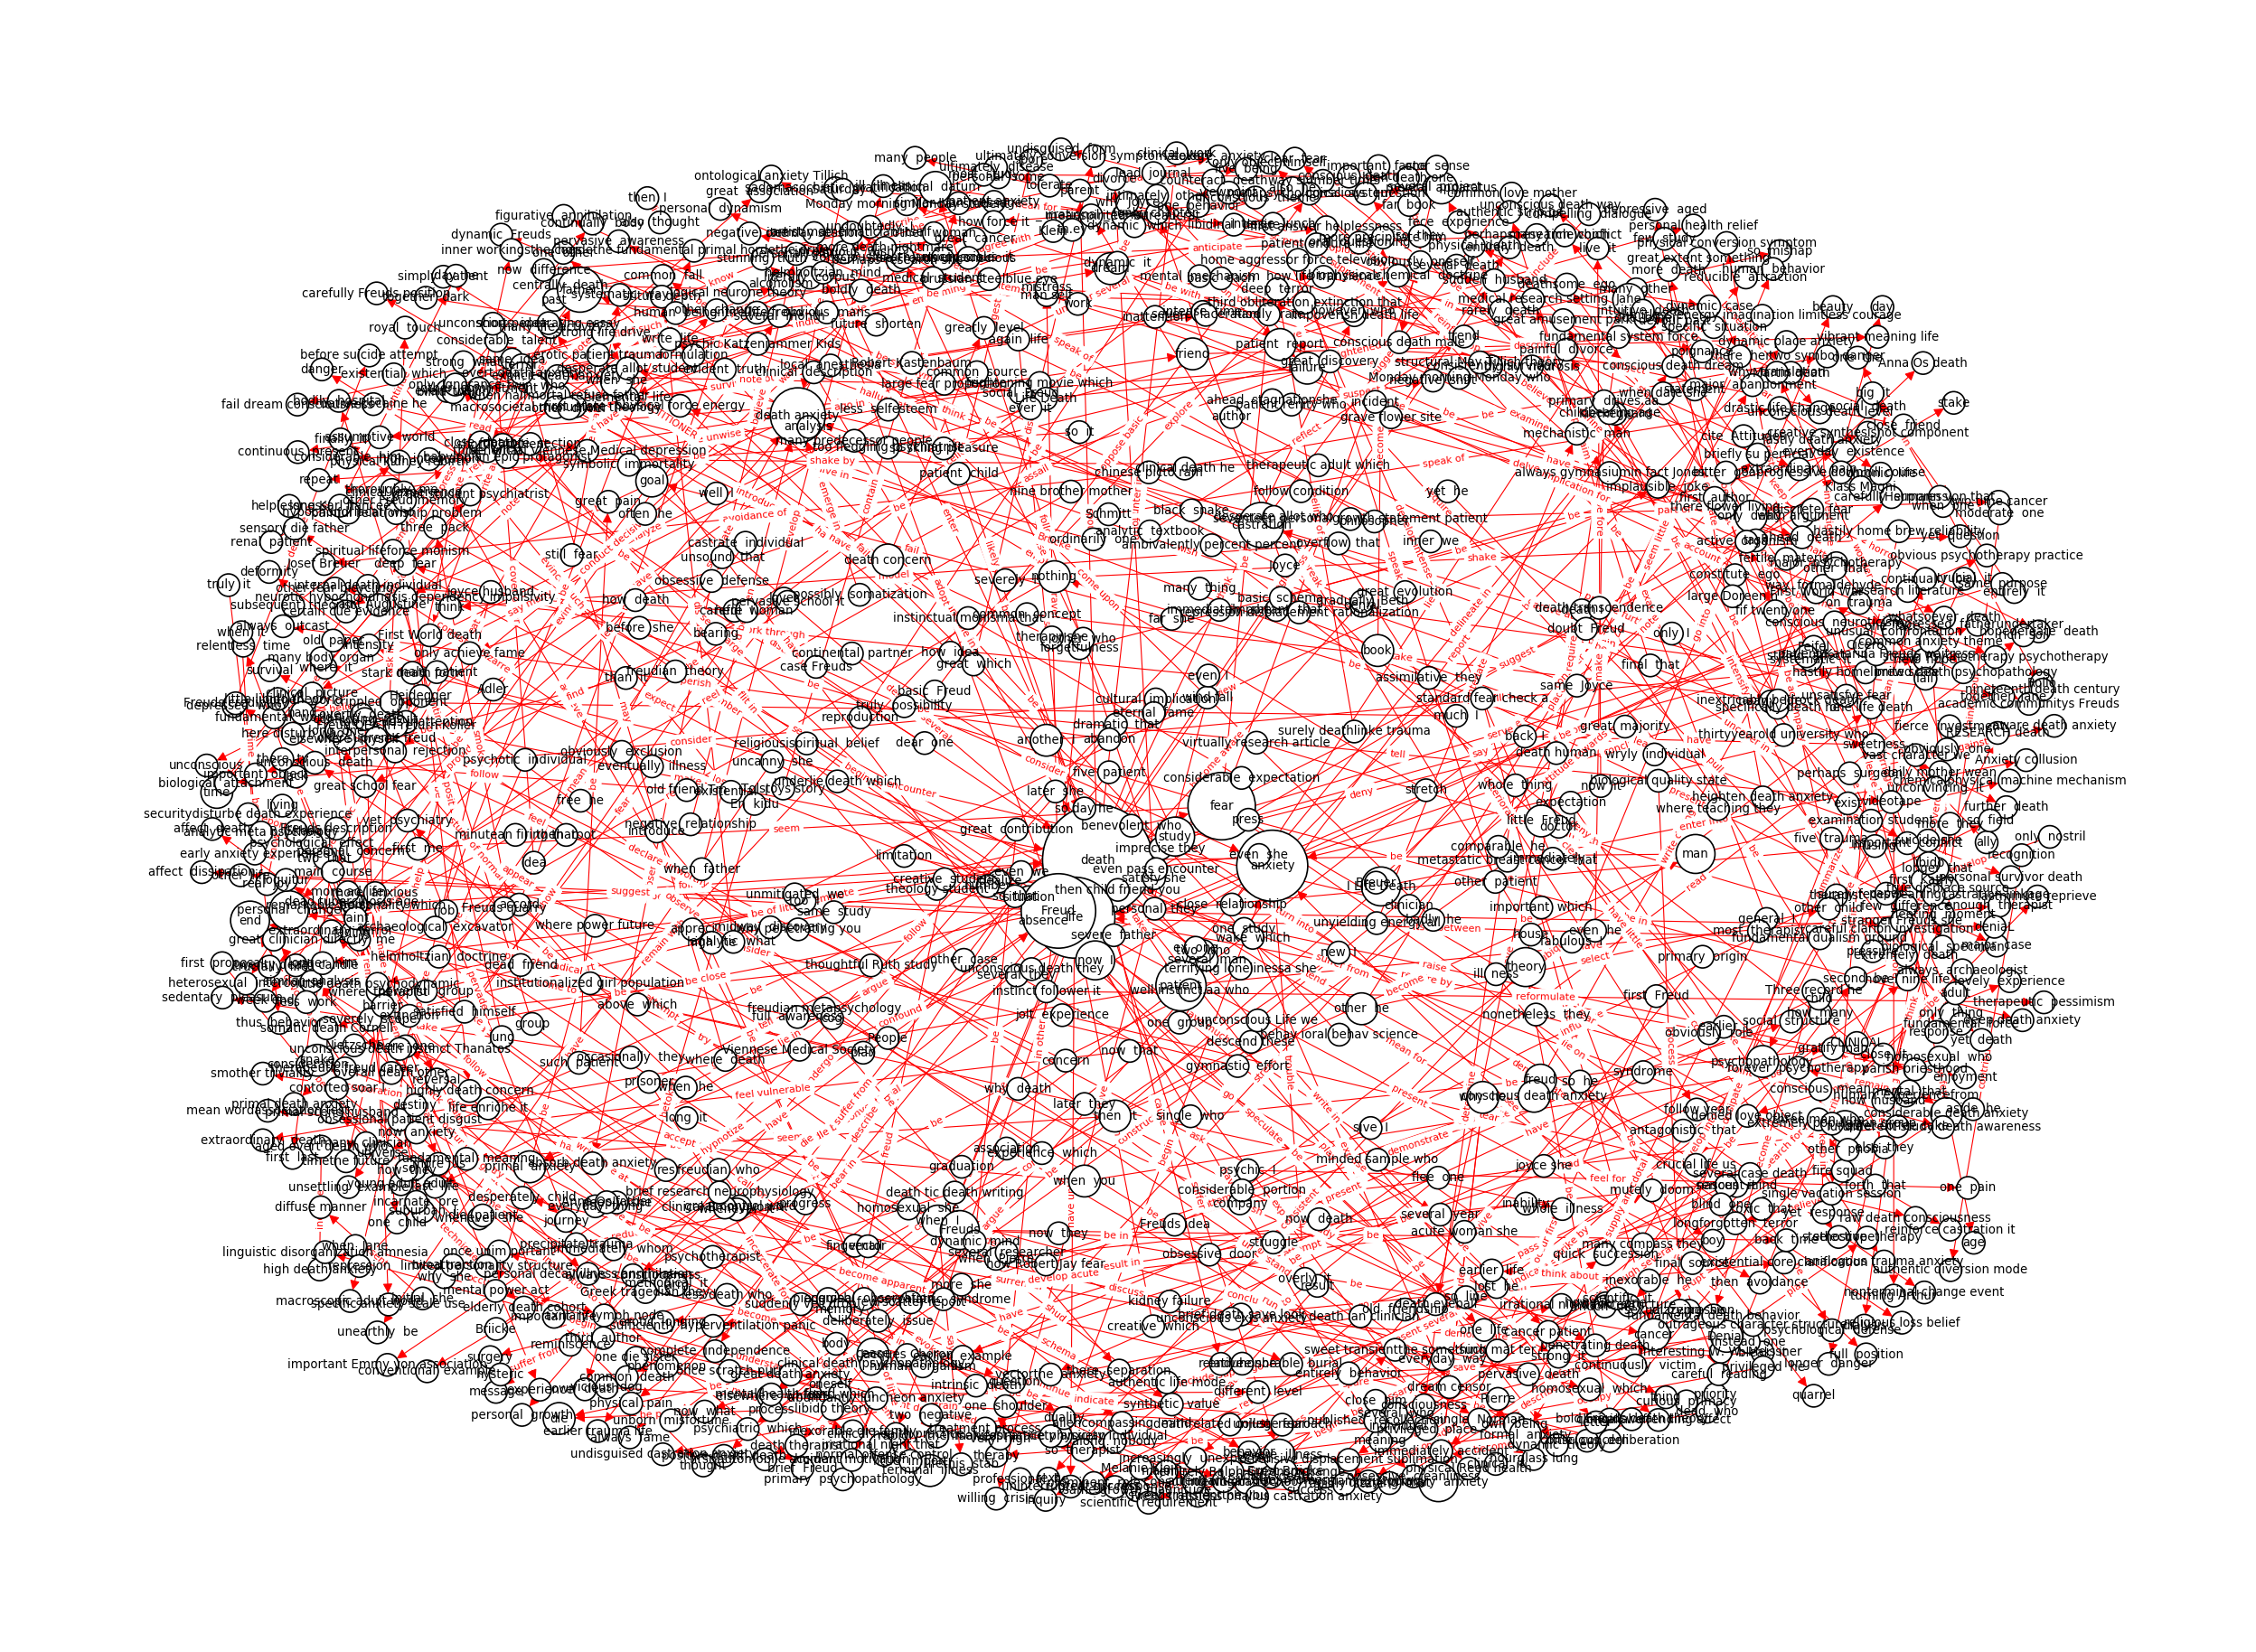

In [219]:
draw_kg(ndf.iloc[:,:])

In [220]:
def get_graph(pairs):
    k_graph = nx.from_pandas_edgelist(pairs, "source", "target", 
                              edge_attr='edge',
    create_using=nx.MultiDiGraph())

    node_deg = nx.degree(k_graph)
    layout = nx.spring_layout(k_graph, k=0.15, iterations=20)
    plt.figure(num=None, figsize=(20, 10), dpi=80)

    nx.draw_networkx(k_graph,  node_size=[int(deg[1]) * 500 for deg in node_deg],  arrowsize=20,  linewidths=1.5,  pos=layout,
    edge_color='red',  edgecolors='black',  node_color='white',  )
    labels = dict(zip(list(zip(pairs.source, pairs.target)), pairs['edge'].tolist()))

    nx.draw_networkx_edge_labels(k_graph, pos=layout, edge_labels=labels,font_color='red')

    plt.axis('off')
    plt.show()

In [228]:
ndf.source.value_counts()

death                           14
Freud                           10
fear                             8
life                             5
patient                          5
                                ..
full  awareness                  1
minutean firing that             1
ambivalently percent percent     1
patient anxiety                  1
when  one                        1
Name: source, Length: 542, dtype: int64

In [222]:
ndf.head()

source                      target     edge       source_l  \
0      where  it  great student psychiatrist  scratch      where  it   
2        patient           enough  therapist     have        patient   
4   bitter  goal          hopedefeate  death   horror   bitter  goal   
5     individual                     therapy       be     individual   
6  why  argument                    response    leave  why  argument   

                     target_l   edge_l  
0  great student psychiatrist  scratch  
2           enough  therapist     have  
4          hopedefeate  death   horror  
5                     therapy       be  
6                    response    leave

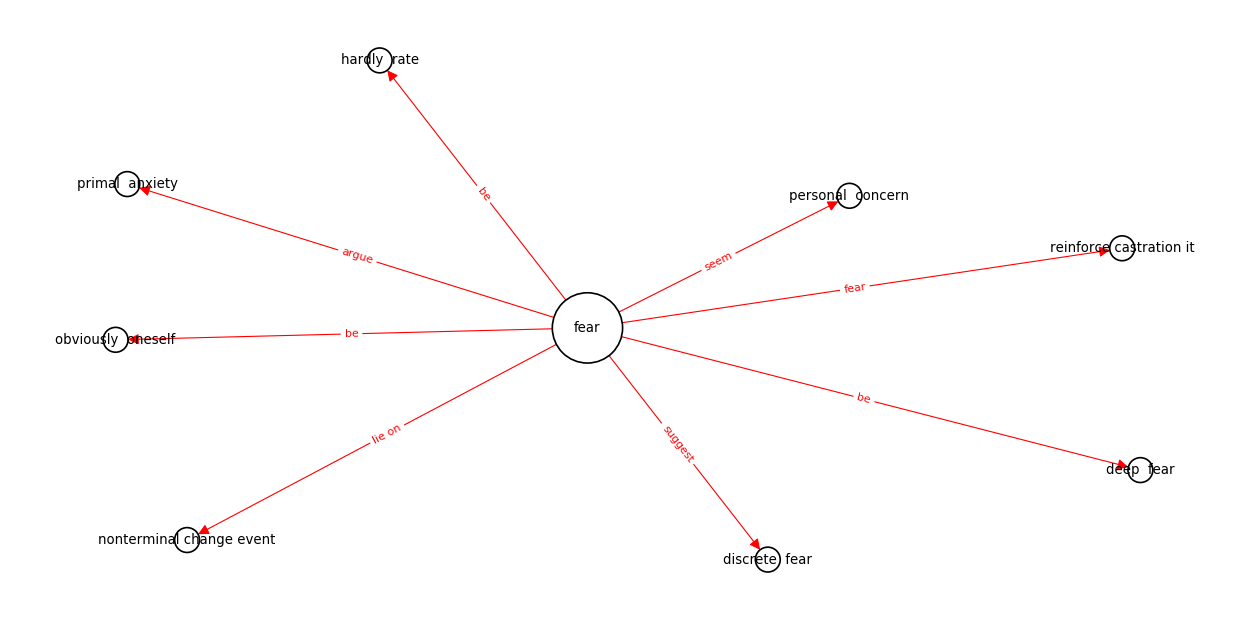

In [230]:
get_graph(ndf[ndf.source.isin(['fear'])])

## Corefernce :

Pronouns and other referring expressions should be connected to the right individuals. Coreference resolution finds the mentions in a text that refer to the same real-world entity. For example, in the sentence, “Andrew said he would buy a car” the pronoun “he” refers to the same person, namely to “Andrew”. More complex example:
<img src=" corefexample.png">
finding all expressions that refer to the same entity in a text.
refer:- https://nlp.stanford.edu/projects/coref.shtml